In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from chardet import detect
from plotly.express import scatter
import plotly.express as px

In [2]:
# 데이터프레임 합치기
dfs = []
file_paths = glob.glob('top 20/*.csv')
for file in file_paths:
    with open(file,'rb') as rawdata:
        detection_result = detect(rawdata.read(10000))
    encoding = detection_result['encoding']
    df = pd.read_csv(file, encoding=encoding)
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)

df=combined_df
# datetime형식으로 바꿔주기
df['created_date'] = pd.to_datetime(df['created_date'])
# 쓸모없는 열 지우기
df.drop(columns=['Unnamed: 0', 'time_location'], inplace=True)
# 인덱스 초기화하기
df.reset_index(drop=True, inplace=True)
# 인덱스 id로 바꿔주기
df.set_index('id', inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4060 entries, 2611.0 to 8927.0
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   kw_location   4060 non-null   object        
 1   created_date  4060 non-null   datetime64[ns]
 2   period        4060 non-null   object        
 3   1             4060 non-null   object        
 4   2             4060 non-null   object        
 5   3             4060 non-null   object        
 6   4             4060 non-null   object        
 7   5             4060 non-null   object        
 8   6             4060 non-null   object        
 9   7             4060 non-null   object        
 10  8             4060 non-null   object        
 11  9             4060 non-null   object        
 12  10            4060 non-null   object        
 13  11            4060 non-null   object        
 14  12            4060 non-null   object        
 15  13            4060 non-null  

In [4]:
df

kw_location        created_date   period                          1  \
id                                                                           
2611.0          US 2022-08-01 08:05:03  Morning           Nichelle Nichols   
2612.0          UK 2022-08-01 08:05:03  Morning           Love Island vote   
2614.0          DE 2022-08-01 08:05:03  Morning                Ivana Trump   
2615.0          FR 2022-08-01 08:05:03  Morning                   1er aout   
2616.0          NL 2022-08-01 08:05:03  Morning           Nichelle Nichols   
...            ...                 ...      ...                        ...   
8923.0          DE 2023-08-31 18:58:03  Evening                   Füllkrug   
8924.0          FR 2023-08-31 18:58:03  Evening            Liste Deschamps   
8925.0          NL 2023-08-31 18:58:03  Evening              Jan Jongbloed   
8926.0          IT 2023-08-31 18:58:03  Evening  Sorteggi Champions League   
8927.0         AUS 2023-08-31 18:58:03  Evening               North Korean   

                            2                      3                      4  \
id                                                                            
2611.0                    UFC           Lil Uzi Vert     England vs Germany   
2612.0               Alex Yee                 Celtic       Matt Walls crash   
2614.0            Fussball EM                 Kosovo             Hertha BSC   
2615.0                   Mano        Jeanfi Janssens         Prince William   
2616.0              Ihattaren           F1 Hongarije                Wiegman   
...                       ...                    ...                    ...   
8923.0      One Piece Netflix                Bonucci        Mitch McConnell   
8924.0         Novak Djokovic         Lenny Martinez                Supreme   
8925.0                 Lavoie           Carel Eiting         Tong Tong Fair   
8926.0  Incidente ferroviario      One Piece Netflix              Guendouzi   
8927.0       Broncos vs Storm  One Piece live action  Champions League draw   

                             5                           6  \
id                                                           
2611.0      Bill Russell death                  Tony Finau   
2612.0               Beth Mead            Nichelle Nichols   
2614.0        Nichelle Nichols                     Schalke   
2615.0        Nichelle Nichols               Jeanne Moreau   
2616.0            Almere  Ajax           Manchester United   
...                        ...                         ...   
8923.0   UEFA champions league  Champions League Auslosung   
8924.0               Ansu Fati          France \u2013 Iran   
8925.0        Starfield review                         PSV   
8926.0  Giorgia Meloni Caivano                  Lady Diana   
8927.0         Mitch McConnell                  COVID visa   

                                   7  ...                  14  \
id                                    ...                       
2611.0  Man United vs Rayo Vallecano  ...  Kenan Thompson SNL   
2612.0                  Leeds United  ...          Becky Hill   
2614.0                    Jule Brand  ...                 PSG   
2615.0                 1er aout fete  ...            Pétanque   
2616.0                        Kosovo  ...             Vitesse   
...                              ...  ...                 ...   
8923.0                 Oliver Pocher  ...          Bürgergeld   
8924.0                 Cyril Hanouna  ...      Clement Beaune   
8925.0                   Saibari PSV  ...             Florida   
8926.0                       Amrabat  ...            Mongolia   
8927.0                       Chelsea  ...     Virginia Trioli   

                        15                    16                          17  \
id                                                                             
2611.0  MLB trade deadline           Mandy Moore           McKinney Fire map   
2612.0          Fran Kirby               UFC 277     Real Madrid vs Juv

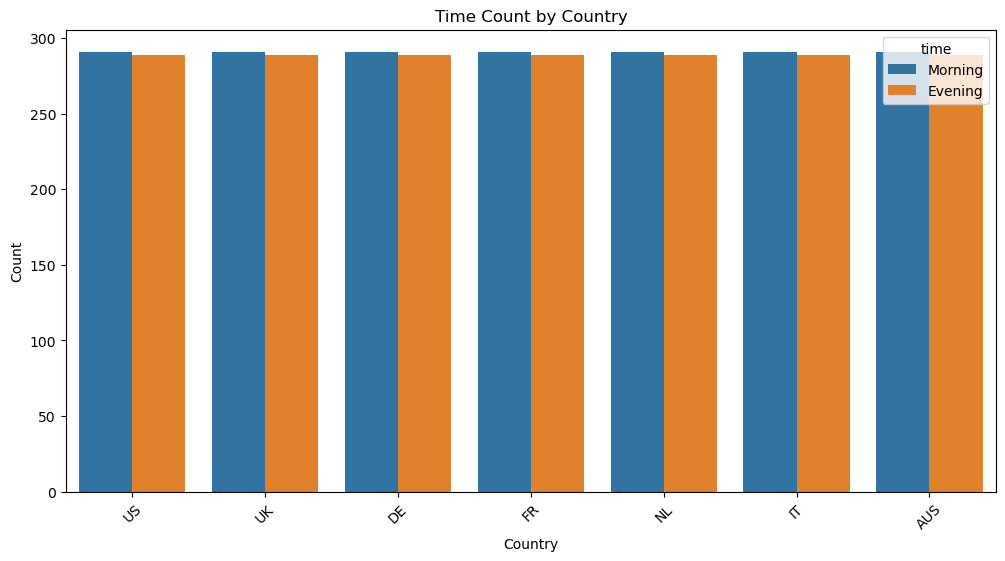

In [5]:
# 국가별 낮과 밤 중 언제 검색을 더 많이 했는지 그리기
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='kw_location', hue='period')

plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Time Count by Country")
plt.xticks(rotation=45)
plt.legend(title="time")

# Show the plot
plt.show()

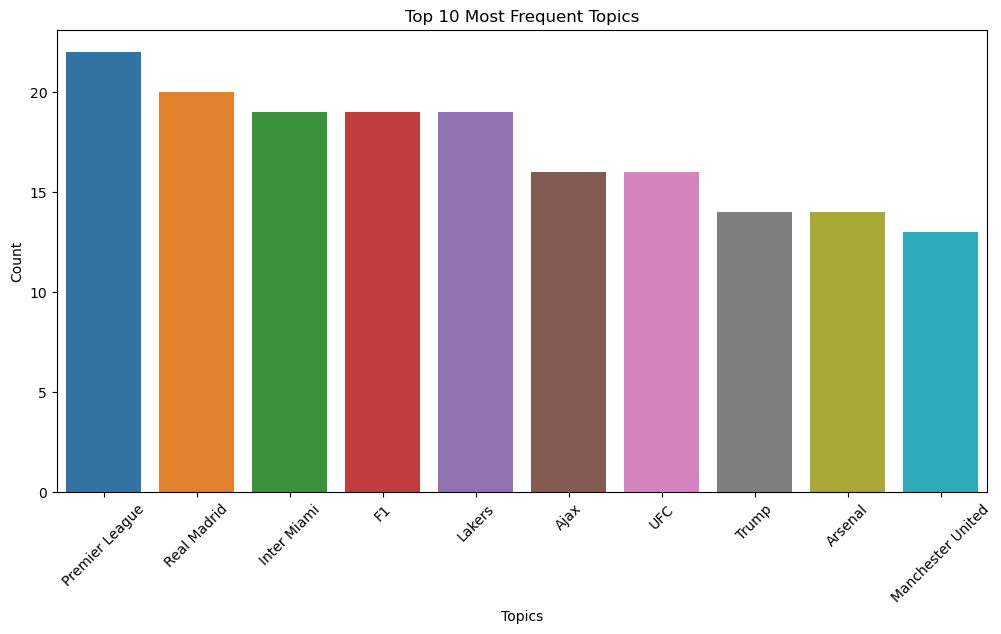

In [6]:
# 1~20열의 문자열 값을 카운트하고 최빈값을 찾는다.
most_frequent_topics = df.iloc[:, 3:23].apply(lambda x: x.value_counts().idxmax(), axis=1)

# 정리한 데이터 중 상위 10개를 노출시킨다.
top10_most_frequent = most_frequent_topics.value_counts().head(10)

# bar graph Plotting하기
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_most_frequent.index, y=top10_most_frequent.values)
plt.title('Top 10 Most Frequent Topics')
plt.xlabel('Topics')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()

In [7]:
# topic을 하나로 모아 결합한다.
df['topic_list'] = df.apply(lambda row: row['1':'20'].tolist(), axis=1)
# topic_list 확인
combined_topics_df = df.groupby('kw_location')['topic_list'].apply(list).reset_index()

print(combined_topics_df)

  kw_location                                         topic_list
0         AUS  [[UFC, Bill Russell, Liverpool vs Strasbourg, ...
1          DE  [[Ivana Trump, Fussball EM, Kosovo, Hertha BSC...
2          FR  [[1er aout, Mano, Jeanfi Janssens, Prince Will...
3          IT  [[Alessandro Canino, Natalia Paragoni, Higuain...
4          NL  [[Nichelle Nichols, Ihattaren, F1 Hongarije, W...
5          UK  [[Love Island vote, Alex Yee, Celtic, Matt Wal...
6          US  [[Nichelle Nichols, UFC, Lil Uzi Vert, England...


In [8]:
df

kw_location        created_date   period                          1  \
id                                                                           
2611.0          US 2022-08-01 08:05:03  Morning           Nichelle Nichols   
2612.0          UK 2022-08-01 08:05:03  Morning           Love Island vote   
2614.0          DE 2022-08-01 08:05:03  Morning                Ivana Trump   
2615.0          FR 2022-08-01 08:05:03  Morning                   1er aout   
2616.0          NL 2022-08-01 08:05:03  Morning           Nichelle Nichols   
...            ...                 ...      ...                        ...   
8923.0          DE 2023-08-31 18:58:03  Evening                   Füllkrug   
8924.0          FR 2023-08-31 18:58:03  Evening            Liste Deschamps   
8925.0          NL 2023-08-31 18:58:03  Evening              Jan Jongbloed   
8926.0          IT 2023-08-31 18:58:03  Evening  Sorteggi Champions League   
8927.0         AUS 2023-08-31 18:58:03  Evening               North Korean   

                            2                      3                      4  \
id                                                                            
2611.0                    UFC           Lil Uzi Vert     England vs Germany   
2612.0               Alex Yee                 Celtic       Matt Walls crash   
2614.0            Fussball EM                 Kosovo             Hertha BSC   
2615.0                   Mano        Jeanfi Janssens         Prince William   
2616.0              Ihattaren           F1 Hongarije                Wiegman   
...                       ...                    ...                    ...   
8923.0      One Piece Netflix                Bonucci        Mitch McConnell   
8924.0         Novak Djokovic         Lenny Martinez                Supreme   
8925.0                 Lavoie           Carel Eiting         Tong Tong Fair   
8926.0  Incidente ferroviario      One Piece Netflix              Guendouzi   
8927.0       Broncos vs Storm  One Piece live action  Champions League draw   

                             5                           6  \
id                                                           
2611.0      Bill Russell death                  Tony Finau   
2612.0               Beth Mead            Nichelle Nichols   
2614.0        Nichelle Nichols                     Schalke   
2615.0        Nichelle Nichols               Jeanne Moreau   
2616.0            Almere  Ajax           Manchester United   
...                        ...                         ...   
8923.0   UEFA champions league  Champions League Auslosung   
8924.0               Ansu Fati          France \u2013 Iran   
8925.0        Starfield review                         PSV   
8926.0  Giorgia Meloni Caivano                  Lady Diana   
8927.0         Mitch McConnell                  COVID visa   

                                   7  ...                  15  \
id                                    ...                       
2611.0  Man United vs Rayo Vallecano  ...  MLB trade deadline   
2612.0                  Leeds United  ...          Fran Kirby   
2614.0                    Jule Brand  ...       Frauenfußball   
2615.0                 1er aout fete  ...       Florent Pagny   
2616.0                        Kosovo  ...                Ajax   
...                              ...  ...                 ...   
8923.0                 Oliver Pocher  ...             US Open   
8924.0                 Cyril Hanouna  ...     Volley : France   
8925.0                   Saibari PSV  ...         Sam Lammers   
8926.0                       Amrabat  ...           Wozniacki   
8927.0                       Chelsea  ...           Ansu Fati   

                          16                          17  \
id                                                         
2611.0           Mandy Moore           McKinney Fire map   
2612.0               UFC 277     Real Madrid vs Juventus   
2614.0           Tina Ruland                Dieter Wedel   
2615.0     

In [9]:
# 나라별 월마다 검색한 데이터를 scatter로 확인하기
scatter(data_frame=df, x='kw_location', y='created_date', hover_name='topic_list', ).show()

In [10]:
# 특정 국가 (예: 'AUS')에서 가장 많이 검색된 데이터를 찾기 위한 함수
def get_top_search_terms(df, country_code):
    # 특정 국가에서의 데이터 추출
    country_data = df[df['kw_location'] == country_code]

    # 열 1부터 20까지의 열에 대한 값을 카운트하여 합칩니다.
    term_counts = pd.Series()
    for column in range(1, 21):
        term_counts = term_counts.add(country_data[str(column)].value_counts(), fill_value=0)

    # 카운트를 기준으로 정렬하고 상위 50개를 선택합니다.
    top_50_terms = term_counts.sort_values(ascending=False).head(50)

    return top_50_terms

# 특정 국가 (예: 'AUS')에서 가장 많이 검색된 데이터를 가져옵니다.
country_code = 'AUS'
top_terms = get_top_search_terms(df, country_code)

# Plotly를 사용하여 인터랙티브 막대 그래프를 그립니다.
fig = px.bar(top_terms.reset_index(), x='index', y=0)
fig.update_traces(text=top_terms.values, textposition='outside')  # 막대에 텍스트 추가
fig.update_layout(title=f'Top 50 Search Terms in {country_code}', xaxis_title='Term', yaxis_title='Count')
fig.update_xaxes(tickangle=45)  # x 축 레이블을 45도 회전시켜 보기 편하게 만듭니다.

fig.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11924\2838865098.py:7: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

